<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum05"

In [5]:
#membaca file csv menggunakan pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum05/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#menentukan fitur dan target
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols] #variabel independen (fitur)
y = df['Species'] #variabel dependen (target)

In [7]:
#membagi data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% data untuk tasting
    random_state=42, #agar hasil pembagian konsisten
    stratify=y #supaya proporsi tiap kelas seimbang
)

#Melihat jumlah data
len(X_train), len(X_test)

(120, 30)

In [18]:
#Membuat model decision tree dengan parameter tertentu
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

#Melatih model menggunakan data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Melakukan prediksi pada data testing
y_pred = dt.predict(X_test)

# Menampilkan hasil evaluasi
print("Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 96.67 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



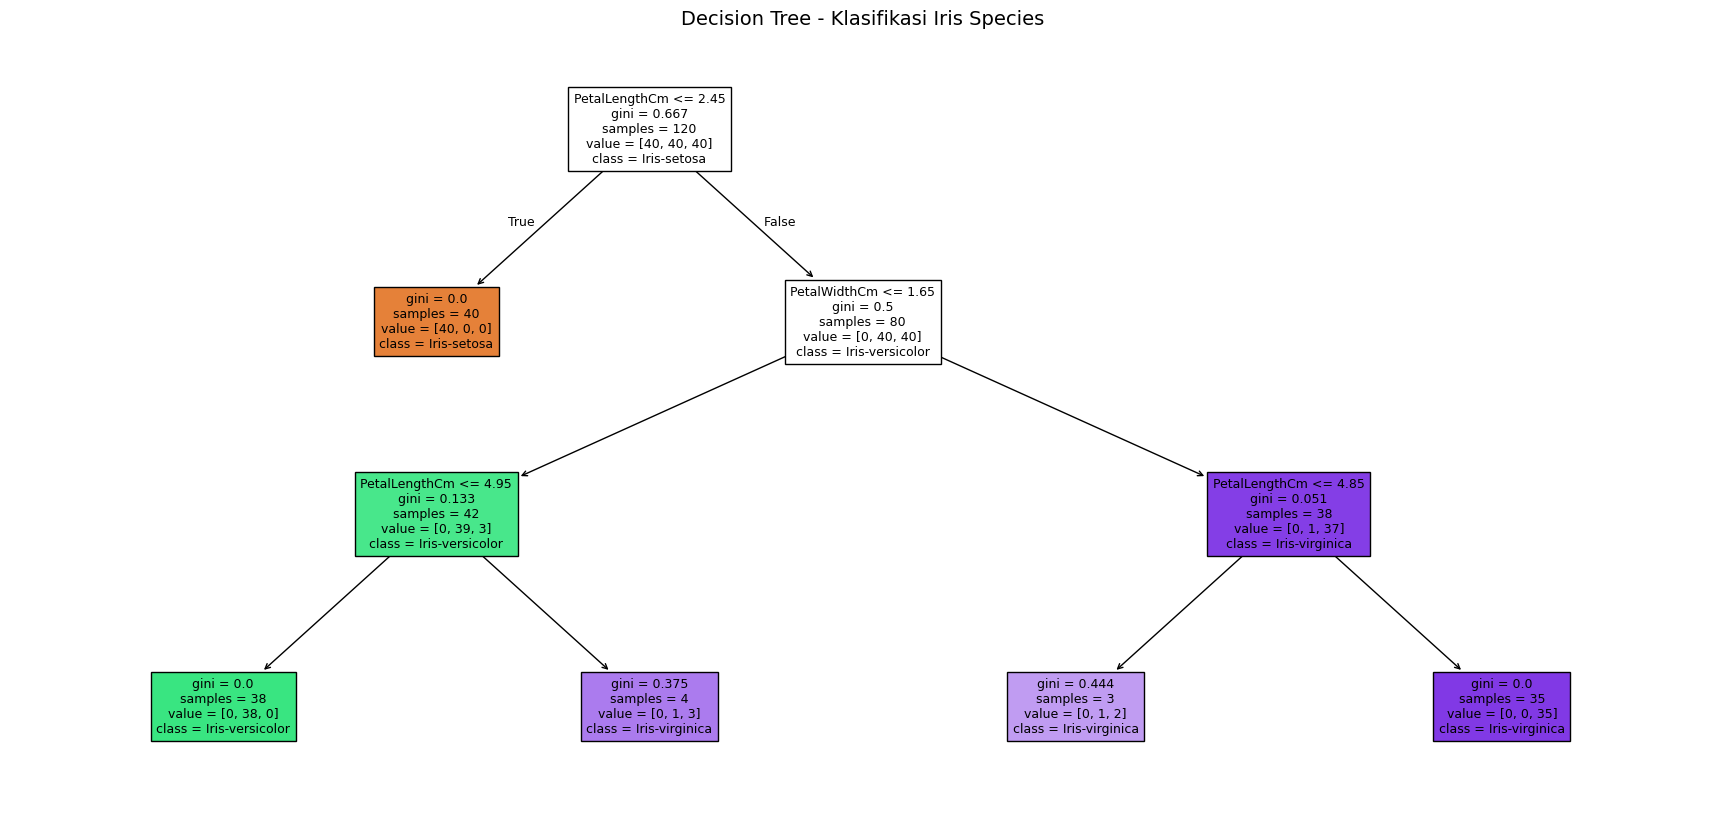

Pola,Kategori Dominan,Makna
PetalLengthCm ≤ 2.45,Iris-setosa,Bunga dengan petal sangat pendek → pasti setosa.
PetalLengthCm antara 2.45–5.0 dan PetalWidthCm ≤ 1.75,Iris-versicolor,Petal sedang dan lebar sedang → cenderung versicolor.
PetalLengthCm > 5.0 dan PetalWidthCm > 1.75,Iris-virginica,Petal panjang dan lebar besar → cenderung virginica.
PetalWidthCm sangat kecil (< 0.6),Iris-setosa,Petal sangat kecil → mudah dibedakan dari spesies lain.
PetalWidthCm sangat besar (> 1.8),Iris-virginica,Petal lebar & panjang → menunjukkan spesies yang lebih besar.


In [20]:
#Visualisasi Model Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Menentukan nama kelas dari target
iris_classes = y.unique()

# Membuat visualisasi pohon keputusan
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,   # nama fitur input
    class_names=iris_classes,     # nama target kelas
    filled=True,                  # memberi warna sesuai kelas
    fontsize=9                    # ukuran teks pada node
)
plt.title("Decision Tree - Klasifikasi Iris Species", fontsize=14)
plt.show()

# Tabel Interpretasi Model

data_interpretasi = {
    "Pola": [
        "PetalLengthCm ≤ 2.45",
        "PetalLengthCm antara 2.45–5.0 dan PetalWidthCm ≤ 1.75",
        "PetalLengthCm > 5.0 dan PetalWidthCm > 1.75",
        "PetalWidthCm sangat kecil (< 0.6)",
        "PetalWidthCm sangat besar (> 1.8)"
    ],
    "Kategori Dominan": [
        "Iris-setosa",
        "Iris-versicolor",
        "Iris-virginica",
        "Iris-setosa",
        "Iris-virginica"
    ],
    "Makna": [
        "Bunga dengan petal sangat pendek → pasti setosa.",
        "Petal sedang dan lebar sedang → cenderung versicolor.",
        "Petal panjang dan lebar besar → cenderung virginica.",
        "Petal sangat kecil → mudah dibedakan dari spesies lain.",
        "Petal lebar & panjang → menunjukkan spesies yang lebih besar."
    ]
}

tabel_interpretasi = pd.DataFrame(data_interpretasi)

# Menampilkan tabel dengan style rapi seperti di gambar
display(HTML(tabel_interpretasi.to_html(index=False)))

Akurasi Model Decision Tree: 96.67%


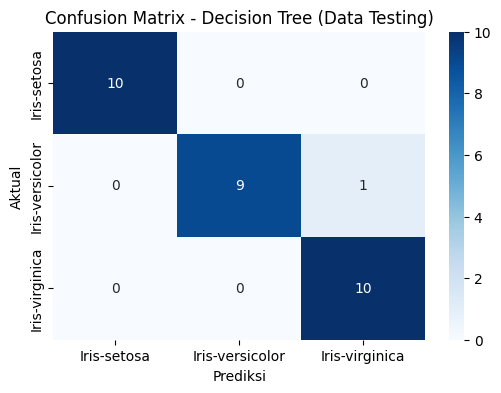


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
#Menguji Model Decision Tree dengan Data Testing

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data testing
y_pred = dt.predict(X_test)

# Akurasi model
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {akurasi*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix - Decision Tree (Data Testing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique()))